In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def crop_barcode(img):
    # Find contours in the binary image
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Find the horizontal limits of the barcode
    x_min = min([cv.boundingRect(contour)[0] for contour in contours])  # Leftmost x-coordinate
    x_max = max([cv.boundingRect(contour)[0] + cv.boundingRect(contour)[2] for contour in contours])  # Rightmost x-coordinate

    # Assume the largest contour corresponds to the vertical extent of the barcode
    largest_contour = max(contours, key=cv.contourArea)
    _, y, _, h = cv.boundingRect(largest_contour)  # Get the y and height (vertical cropping)

    # Crop the image so that only the barcode is visible
    cropped_img = img[y:y + h, x_min:x_max]
    
    # Draw the bounding rectangle of the largest contour in green
    cv.rectangle(img, (x_min, y), (x_max, y + h), (0, 255, 0), 2)

    # Draw all contours in red
    contour_img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)  # Convert to BGR for colored drawing
    cv.drawContours(contour_img, contours, -1, (0, 0, 255), 2)  # Draw all contours in red

    return cropped_img, contour_img

def crop_barcode2(img):

    # Find contours in the binary image
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Assume the largest contour probably corresponds to a wide bar in the barcode
    largest_contour = max(contours, key=cv.contourArea)
    largest_contour_area = cv.contourArea(largest_contour)

    # Find the horizontal limits of the barcode
    x_min = None
    x_max = None
    for contour in contours:
        contour_area = cv.contourArea(contour)
        if contour_area >= 0.2 * largest_contour_area:  # Check if the contour area is at least 20% of the largest contour
            x, _, w, _ = cv.boundingRect(contour)
            if x_min is None or x < x_min:
                x_min = x
            if x_max is None or x + w > x_max:
                x_max = x + w

    # If no valid contours are found, use the entire width of the image
    if x_min is None or x_max is None:
        x_min = 0
        x_max = img.shape[1]

    # Get the vertical limits from the largest contour
    _, y, _, h = cv.boundingRect(largest_contour)

    # Crop the image so that only the barcode is visible
    cropped_img = img[y:y + h, x_min:x_max]

    # Draw the bounding rectangle of the largest contour in green
    cv.rectangle(img, (x_min, y), (x_max, y + h), (0, 255, 0), 2)

    # Draw all contours in red
    contour_img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)  # Convert to BGR for colored drawing
    cv.drawContours(contour_img, contours, -1, (0, 0, 255), 2)  # Draw all contours in red

    return cropped_img, contour_img

def display_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

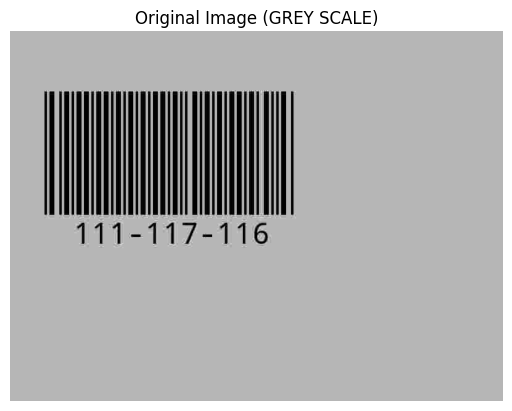

In [10]:
img = cv.imread('Samples/Test Cases/05 - meen taffa el nour!!!.jpg', cv.IMREAD_GRAYSCALE)
display_image(img,'Original Image (GREY SCALE)')

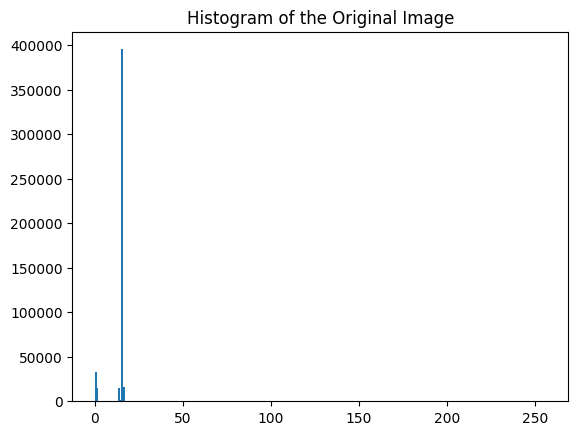

In [11]:
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram of the Original Image')
plt.show()

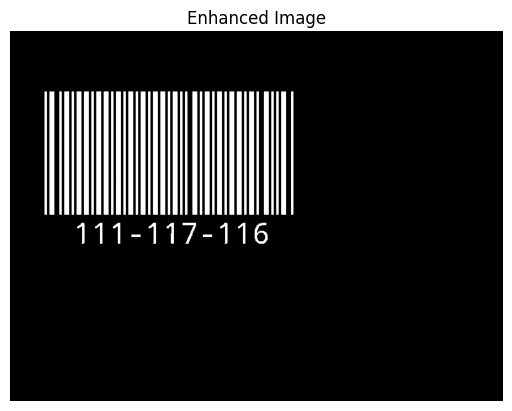

In [22]:
_, thresholded_img = cv.threshold(img, 7, 255, cv.THRESH_BINARY_INV)
display_image(thresholded_img,'Enhanced Image')


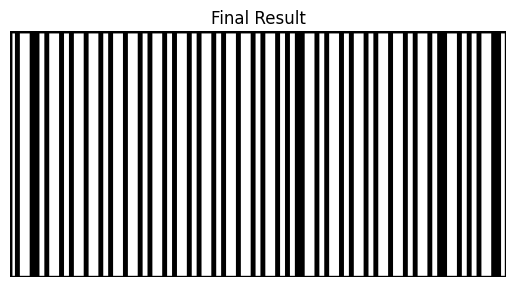

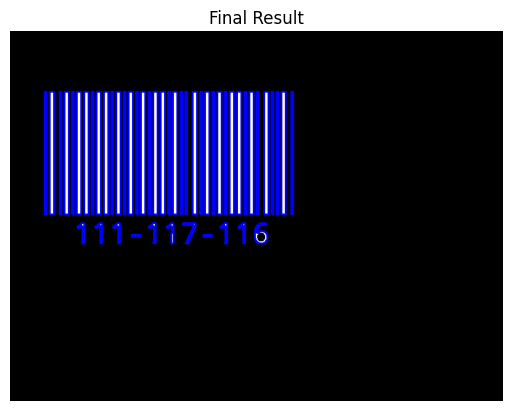

In [23]:
cropped_img, contoured_img = crop_barcode2(thresholded_img)
display_image(cropped_img,'Final Result')
display_image(contoured_img,'Final Result')